Build a regression model.

R² Score: 0.002188658062757365
Mean Squared Error: 52.72721924699635


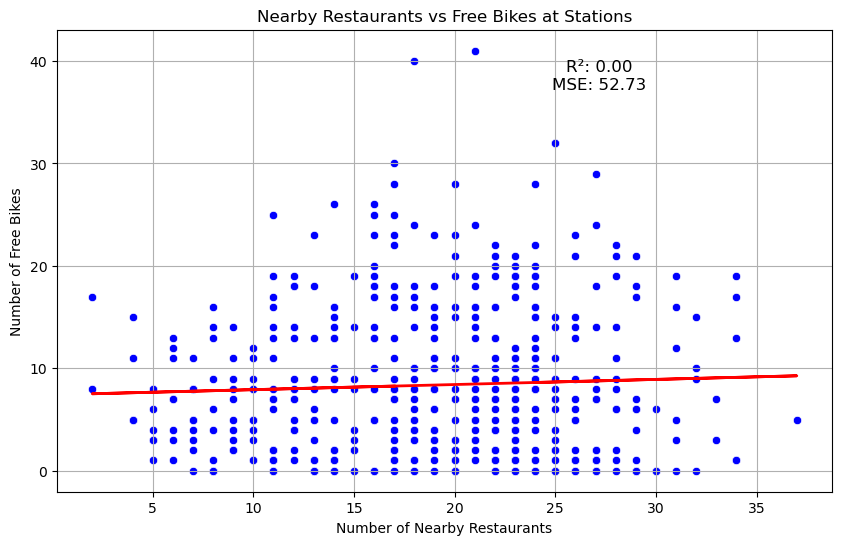

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming merged_df is already created from the previous merge step

# Step 1: Filter only restaurant-related POIs
restaurant_keywords = ['restaurant', 'tapas', 'bar', 'cafeteria', 'cafe']
restaurant_df = merged_df[merged_df['category'].str.lower().str.contains('|'.join(restaurant_keywords), na=False)]

# Step 2: Count restaurants per station
restaurant_counts = restaurant_df.groupby('station_name').size().reset_index(name='restaurant_count')

# Step 3: Get free_bikes per station (removing duplicates just in case)
bike_availability = merged_df[['station_name', 'free_bikes']].drop_duplicates(subset='station_name')

# Step 4: Merge restaurant counts with free bike availability
restaurant_bike_df = pd.merge(restaurant_counts, bike_availability, on='station_name')

# Step 5: Prepare the data for modeling
X = restaurant_bike_df[['restaurant_count']]  # Independent variable: restaurant count
y = restaurant_bike_df['free_bikes']         # Dependent variable: free bikes

# Step 6: Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 7: Make predictions
y_pred = model.predict(X)

# Step 8: Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

# Step 9: Plot the data and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=restaurant_bike_df, x='restaurant_count', y='free_bikes', color='blue')
plt.plot(restaurant_bike_df['restaurant_count'], y_pred, color='red', linewidth=2)  # Regression line
plt.title('Nearby Restaurants vs Free Bikes at Stations')
plt.xlabel('Number of Nearby Restaurants')
plt.ylabel('Number of Free Bikes')
plt.grid(True)

# Display R² and MSE on the plot
plt.text(0.7, 0.9, f'R²: {r2:.2f}\nMSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()


In [13]:
merged_df

,station_name,station_longitude,station_latitude,free_bikes,empty_slots,fsq_id,station_id,poi_name,poi_latitude,poi_longitude,location,category,distance
0,"PL JOANIC - C / BRUNIQUER, 59",2.162255,41.405520,1,14,00028670e3d01438515caba403ffd680,0,Vermuteria Lou,41.405910,2.162397,"{'address': 'Carrer Escorial, 3', 'address_ext...",Bar,48
1,"PL JOANIC - C / BRUNIQUER, 59",2.162255,41.405520,1,14,00028670e3d01438515caba403ffd680,0,Plaça de John Lennon,41.402858,2.161527,"{'admin_region': 'Cataluña', 'country': 'ES', ...",Plaza,301
2,"PL JOANIC - C / BRUNIQUER, 59",2.162255,41.405520,1,14,00028670e3d01438515caba403ffd680,0,La Catrina,41.407947,2.159362,"{'address': 'Providencia, 88', 'admin_region':...",Mediterranean Restaurant,361
3,"PL JOANIC - C / BRUNIQUER, 59",2.162255,41.405520,1,14,00028670e3d01438515caba403ffd680,0,Cal Boter,41.402166,2.162457,"{'address': 'Tordera, 62', 'admin_region': 'Ca...",Catalan Restaurant,374
4,"PL JOANIC - C / BRUNIQUER, 59",2.162255,41.405520,1,14,00028670e3d01438515caba403ffd680,0,Verdi Park,41.404424,2.157652,"{'address': 'Calle Torrijos, 49', 'admin_regio...",Indie Movie Theater,396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23622,"C/ RAMON TURRÓ, 246",2.205380,41.401708,19,7,ffbaa273abd20a25367fc85ccfd7330c,514,Nova Mar Bella Beach (Platja de la Nova Mar Be...,41.401871,2.215125,"{'address': 'Avenida Litoral, 89', 'admin_regi...",Beach,810
23623,"C/ RAMON TURRÓ, 246",2.205380,41.401708,19,7,ffbaa273abd20a25367fc85ccfd7330c,514,Bogatell Beach (Platja del Bogatell),41.394077,2.206645,"{'address': 'Paseo Maritimo del Bogatell, 80',...",Beach,856
23624,"C/ RAMON TURRÓ, 246",2.205380,41.401708,19,7,ffbaa273abd20a25367fc85ccfd7330c,514,Leka,41.397480,2.196693,"{'address': 'Carrer de Badajoz, 65', 'admin_re...",Bar,852
23625,"C/ RAMON TURRÓ, 246",2.205380,41.401708,19,7,ffbaa273abd20a25367fc85ccfd7330c,514,Cafeteria Industrial,41.399175,2.195368,"{'address': 'Calle de Pallars, 154', 'admin_re...",Cafeteria,880


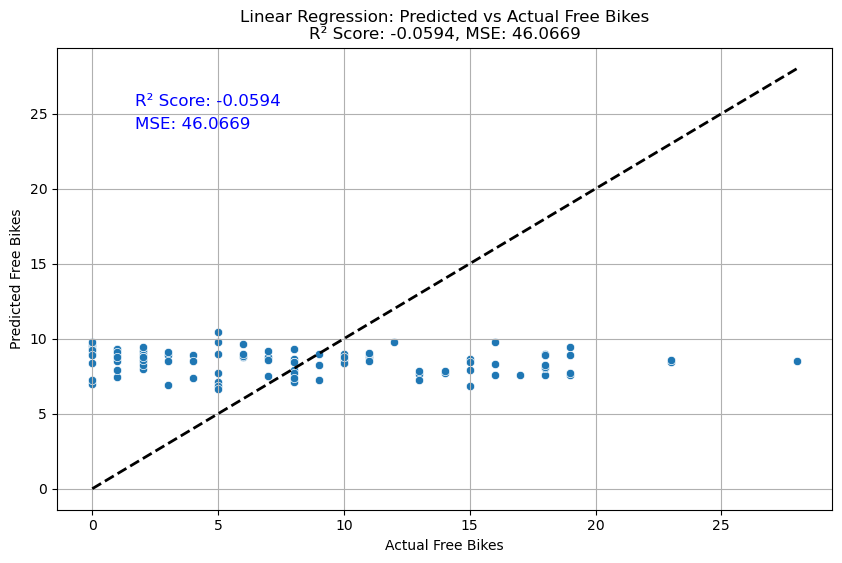

In [7]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_bicing = pd.read_csv("bicing.csv")
df_poi = pd.read_csv("poi.csv")

# Merge df_poi and df_bicing using station_id in df_poi and index in df_bicing
merged_df = pd.merge(df_bicing, df_poi, left_index=True, right_on='station_id', how='left')

# Merge df_poi and df_bicing using station_id in df_poi and index in df_bicing
merged_df = pd.merge(df_bicing, df_poi, left_index=True, right_on='station_id', how='left')

merged_df.rename(columns={
    'name_x': 'station_name',     # Rename name from bicing
    'name_y': 'poi_name',         # Rename name from poi
    'latitude_x': 'station_latitude',  # Rename latitude from bicing
    'longitude_x': 'station_longitude',  # Rename longitude from bicing
    'latitude_y': 'poi_latitude',  # Rename latitude from poi
    'longitude_y': 'poi_longitude'  # Rename longitude from poi
}, inplace=True)

# Drop the 'Unnamed: 0_x' column from the DataFrame
merged_df.drop(columns=['Unnamed: 0_x'], inplace=True)
merged_df.drop(columns=['Unnamed: 0_y'], inplace=True)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Filter only restaurant-related POIs
restaurant_keywords = ['restaurant', 'tapas', 'bar', 'cafeteria', 'cafe']
restaurant_df = merged_df[merged_df['category'].str.lower().str.contains('|'.join(restaurant_keywords), na=False)]

# Step 2: Count restaurants per station
restaurant_counts = restaurant_df.groupby('station_name').size().reset_index(name='restaurant_count')

# Step 3: Get free_bikes per station (removing duplicates just in case)
bike_availability = merged_df[['station_name', 'free_bikes']].drop_duplicates(subset='station_name')

# Step 4: Merge restaurant counts with free bike availability
restaurant_bike_df = pd.merge(restaurant_counts, bike_availability, on='station_name')

# Step 5: Optionally, add a better feature: Distance to nearest restaurant
# Assuming 'distance' column exists in the merged data, we can try including it in the model
restaurant_bike_df['distance_to_nearest_restaurant'] = merged_df.groupby('station_name')['distance'].min().reset_index(drop=True)

# Step 6: Prepare the data for regression
X = restaurant_bike_df[['restaurant_count', 'distance_to_nearest_restaurant']]  # Adding new feature here
y = restaurant_bike_df['free_bikes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Calculate R² score and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Step 10: Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title(f'Linear Regression: Predicted vs Actual Free Bikes\nR² Score: {r2:.4f}, MSE: {mse:.4f}')
plt.xlabel('Actual Free Bikes')
plt.ylabel('Predicted Free Bikes')
plt.grid(True)

# Step 11: Add R² and MSE on the plot
plt.text(0.1, 0.9, f'R² Score: {r2:.4f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.1, 0.85, f'MSE: {mse:.4f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.show()


Provide model output and an interpretation of the results. 

# Stretch

How can you turn the regression model into a classification model?